In [1]:
import numpy as np
import torch
from torch import autograd
from matplotlib import pyplot as plt

# Problem E.1 
Consider the function 
<center>
$f(x) = (x - 1)^4 + 3$
</center>

## 1.
Compute the symbolic derivative of the above function. Then compute the value of
derivative of the function at $x = 2$, i.e $\frac{df}{dx} (x = 2)$.

With paper and pencil, we work out that the symbolic derivative of the function is $\frac{df}{dx} = 4(x - 1)^3$, and that the value of derivative of the function at $x = 2$ is $4$.

## 2.
Code up the above function as a Python function using torch mathematical expressions (otherwise autograd will not work). Use PyTorch auto-differentation to get the same result of the derivative (gradient) at $x = 2$.
## 3.
Show your commented code in a snippet in your report/presentation and show that
the value is the same as the one you calculated by hand.

In [2]:
import numpy as np
import torch
from torch import autograd
from matplotlib import pyplot as plt

# Define the function as a python function using valid PyTorch math operations
def f(x):
    return torch.pow((x - 1), 4) + 3

# Create the tensor with value equal to point of interest
x0 = torch.tensor(2.0, requires_grad = True)
# Evaluate function value at the points of interest. We should expect the answer a tensor with value 4.0.
fx0 = f(x0)
# Now for the gradient computation: We simply call .backward() on the result fx0
fx0.backward() # Should evaluate to tensor(4.)。
x0.grad # tensor(4.)
print(x0.grad.item()) 

4.0


# Problem E.2: 
Consider the function 
<center>
$f(x, y, z) = xy + xz + yz + x^2 + e^y + zsin(x)$
</center>

# 1. 
Compute the expression for $\nabla$$f(x, y, z)$ by hand. In other words, compute the symbolic expressions for the gradient of the function $f$, containing all 3 three partial derivatives. Show the expressions for each partial derivative of $f$.

<center>
$\frac{\partial f}{\partial x} = y + z + 2x + zcos(x)$
<br>
$\frac{\partial f}{\partial y} = x + z + e^y$
<br>
$\frac{\partial f}{\partial z} = x + y + sin(x)$
</center>

## 2. 
What is the gradient of $f$ at the point (${x = \pi, y = 2.0, z = 2.0}$)?

The gradient of $f$ at the point (${x = \pi, y = 2.0, z = 2.0}$) is $(8.2832, 12.5306, 5.1416)$.

## 3. 
Determine the gradient of $f$ using auto-differentiation in PyTorch.
<br>
Show your commented code in a snippet in your report/presentation and show that
the value is the same as the one you calculated by hand.

In [3]:
import numpy as np
import torch
from torch import autograd
from matplotlib import pyplot as plt

def f(x, y, z):
    return x * y + x * z + y * z + torch.pow(x, 2) + torch.exp(y) + z * torch.sin(x)

x0 = torch.tensor(np.pi, requires_grad = True)
y0 = torch.tensor(2.0, requires_grad = True)
z0 = torch.tensor(2.0, requires_grad = True)

fx0y0z0 = f(x0, y0, z0)
fx0y0z0.backward()
print(x0.grad.item(), y0.grad.item(), z0.grad.item())

8.283185958862305 12.530649185180664 5.141592502593994


# Problem E.3: 
Consider the three functions below (defined as a composition), where each function is assumed to use as input the output of the function above it.
<center>
    <br>
    $f(x, y) = x^2 + y^2$
    <br>
    $g(f) = e^{-f}$
    <br>
    $h(g) = ln(g) + g$
</center>

## 1.
Compute expressions for the partial derivatives $\frac{\partial f}{\partial x}$, $\frac{\partial f}{\partial y}$, $\frac{dg}{df}$, $\frac{dh}{dg}$.

$\frac{\partial f}{\partial x} = 2x$
<br>
$\frac{\partial f}{\partial y} = 2y$
<br>
$\frac{dg}{df} = -\frac{1}{e^f}$
<br>
$\frac{dh}{dg} = \frac{1}{f} + 1$

## 2. 
Compute the expressions for $\frac{\partial h}{\partial x}$ and $\frac{\partial h}{\partial y}$, using the chain rule. You should give the expression in terms of only $\frac{\partial f}{\partial x}$, $\frac{\partial f}{\partial y}$, $\frac{dg}{df}$, $\frac{dh}{dg}$.

$\frac{\partial h}{\partial x} = \frac{dh}{dg}\frac{dg}{df}\frac{\partial f}{\partial x} = -2xe^{-x^2 - y^2} - 2x$
<br>
$\frac{\partial h}{\partial y} = \frac{dh}{dg}\frac{dg}{df}\frac{\partial f}{\partial y} = -2ye^{-x^2 - y^2} - 2y$

# Problem E.4: PyTorch Gradient Descent problem, one variable
<center>
    $f(x) = -e^{-(x - \pi)^2} + 0.01 * (x - \pi)^2$
</center>

## 1. 
Plot the above function on the interval $[-5, 11]$.

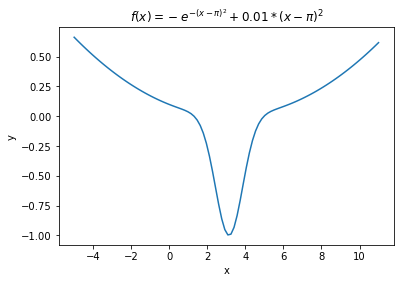

In [4]:
import numpy as np
import torch
from torch import autograd
from matplotlib import pyplot as plt

def f(x):
    return -torch.exp(-torch.pow((x - np.pi), 2)) + 0.01 * torch.pow(x - np.pi, 2)

x = torch.linspace(-5.0, 11.0, 100)
y = f(x)

plt.title("$f(x) = -e^{-(x - \pi)^2} + 0.01 * (x - \pi)^2$") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.plot(x,y) 

## 2.
Find the minimum of the above function by coding up the problem and solution in PyTorch, like in the previous examples. Try different step lengths, observe the behaviour a step size $\eta = 1.0$ and where $\eta = 0.1$, and $\eta = 0.01$, Also track the trajectory of your solution and overlay them on top of the plot, or make a separate plot.

In [5]:
import numpy as np
import torch
from torch import autograd
from matplotlib import pyplot as plt

# Define the objective function.
def f(x):
    return -torch.exp(-torch.pow((x - np.pi), 2)) + 0.01 * torch.pow(x - np.pi, 2)

# Gradient decent function. 有问题！请根据E5修改，否则Inital guess永远不会出现
def gradient_f(f, x, eta, nr_steps):
    # Input: 
    # f: objective function; 
    # x: variables; 
    # eta: step length; 
    # nr_steps: the maximum of the iteration times
    #
    # Return:
    # trajectory_x: a list containing variable x
    # trajectory_fx: a list containing f(x) values
    
    # Create two empty lists to store the trajectory, say 𝑡𝑟𝑎𝑗𝑒𝑐𝑡𝑜𝑟𝑦_𝑥 and 𝑡𝑟𝑎𝑗𝑒𝑐𝑡𝑜𝑟𝑦_𝑓𝑥.
    trajectory_x =[]
    trajectory_fx =[]   
    for i in range(nr_steps):
        trajectory_x.append(x.detach().clone().numpy())
        # Compute function at x.
        fx = f(x)
        # Add the value of fx into the end of the trajectory_fx.
        trajectory_fx.append(fx.item())
        # Compute gradient ->  populate all partial derivatives
        fx.backward()
    
        # Gradient decent update.
        with torch.no_grad():
            x -= eta * x.grad
        
        if (torch.abs(x.grad) > 0.00001): # Stopping criteria: to judge when to stop iterations.
            # Eliminate the gradient to avoid the accumulation of previous gradients of x.
            x.grad.zero_()
        else:
            break

    return trajectory_x, trajectory_fx

The minimum of the function is -0.9899, when x = 3.0413.


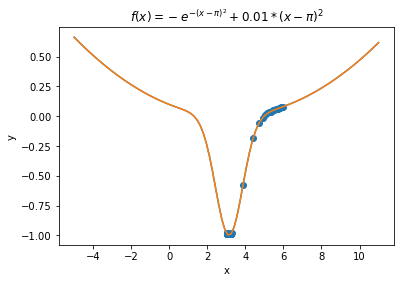

In [6]:
# Initial starting guess. Let's say 6.
x_0 = torch.tensor(6.0, requires_grad = True)
# Step length, eta. Let's say 1.
eta = 1
# Set the maximum of the iteration times. Let's say 5000 times.
nr_steps = 5000

# Call the graident function.
result = gradient_f(f, x_0, eta, nr_steps)
# Optimal x.
optimal_x = result[0][-1]
# The minimum f(x) value.
min_fx = result[1][-1]

print("The minimum of the function is {:.4f}, when x = {:.4f}.".format(min_fx, optimal_x))

# Plot.
plt.title("$f(x) = -e^{-(x - \pi)^2} + 0.01 * (x - \pi)^2$, when step_length = 1.") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.scatter(result[0],result[1]) 


x = torch.linspace(-5.0, 11.0, 100)
y = f(x)
plt.title("$f(x) = -e^{-(x - \pi)^2} + 0.01 * (x - \pi)^2$") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.plot(x,y) 
plt.title("$f(x) = -e^{-(x - \pi)^2} + 0.01 * (x - \pi)^2$") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.plot(x,y) 

The minimum of the function is -1.0000, when x = 3.1416.


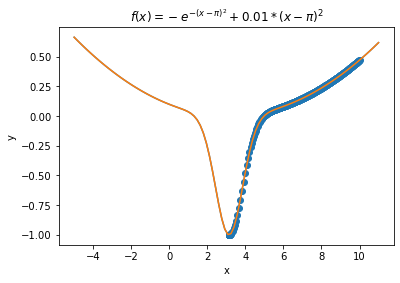

In [7]:
# Initial starting guess. Let's say 1.
x = torch.tensor(10.0, requires_grad = True)
# Step length, eta. Let's say 0.1.
eta = 0.1
# Set the maximum of the iteration times. Let's say 5000 times.
nr_steps = 5000

# Call the graident function.
result = gradient_f(f, x, eta, nr_steps)
# Optimal x.
optimal_x = result[0][-1]
# The minimum f(x) value.
min_fx = result[1][-1]

print("The minimum of the function is {:.4f}, when x = {:.4f}.".format(min_fx, optimal_x))

# Plot.
plt.title("$f(x) = -e^{-(x - \pi)^2} + 0.01 * (x - \pi)^2$, when step_length = 0.1.") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.scatter(result[0],result[1])

x = torch.linspace(-5.0, 11.0, 100)
y = f(x)
plt.title("$f(x) = -e^{-(x - \pi)^2} + 0.01 * (x - \pi)^2$") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.plot(x,y) 
plt.title("$f(x) = -e^{-(x - \pi)^2} + 0.01 * (x - \pi)^2$") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.plot(x,y)

The minimum of the function is -1.0000, when x = 3.1416.


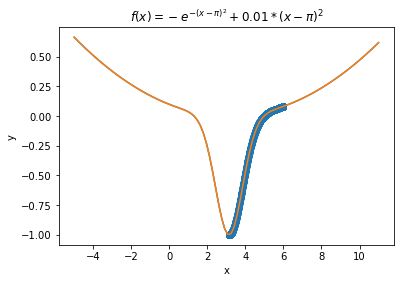

In [8]:
# Initial starting guess. Let's say 6.
x = torch.tensor(6.0, requires_grad = True)
# Step length, eta. Let's say 0.1.
eta = 0.01
# Set the maximum of the iteration times. Let's say 5000 times.
nr_steps = 5000

# Call the graident function.
result = gradient_f(f, x, eta, nr_steps)
# Optimal x.
optimal_x = result[0][-1]
# The minimum f(x) value.
min_fx = result[1][-1]

print("The minimum of the function is {:.4f}, when x = {:.4f}.".format(min_fx, optimal_x))
# Plot.
plt.title("$f(x) = -e^{-(x - \pi)^2} + 0.01 * (x - \pi)^2$, when step_length = 0.01.") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.scatter(result[0],result[1]) 

x = torch.linspace(-5.0, 11.0, 100)
y = f(x)
plt.title("$f(x) = -e^{-(x - \pi)^2} + 0.01 * (x - \pi)^2$") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.plot(x,y) 
plt.title("$f(x) = -e^{-(x - \pi)^2} + 0.01 * (x - \pi)^2$") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.plot(x,y) 

# Problem E.5: PyTorch Gradient Descent problem - multivariable
<center>
    $f(x) = (x - 3$1$)^T(x - 3$1$) = (x_1 - 3)^2 + (x_2 - 3)^2$
</center>



## 1. 
The above function has a global minimum at the point $x = [3.0, 3.0]$. Confirm that
this is the case by coding up a gradient decent minimization script for the above
function, starting at some suitable close by point. Track the solution history and plot
these solutions for each iteration on top of a contour plot of the above function. Use
a suitable step size that doesn't result in 'zig-zag'-ing around the minimum. What
was the value of the step length that did the job?
<br>
For plotting 2D functions, you should look into the words 'numpy meshgrid' or 'torch
meshgrid' and 'pyplot plt.contourf' (you'll also use this in the next assignment)

In [9]:
import numpy as np
import torch
from torch import autograd
from matplotlib import pyplot as plt

def f(x):
    three_vector = 3 * torch.ones_like(x)
    return (x - three_vector).T @ (x - three_vector)

def gradient_f(f, x, eta, nr_steps):
    trajectory_x = []
    trajectory_fx = []
    
    for i in range(nr_steps):
        trajectory_x.append(x.detach().clone().numpy()) 
        # Compute function at x.
        fx = f(x)
        # Add the value of fx into the end of the trajectory_fx.
        trajectory_fx.append(fx.item())
        # Compute gradient ->  populate all partial derivatives
        fx.backward()
    
        # Gradient decent update.
        with torch.no_grad():
            x -= eta * x.grad
        
#         if (torch.abs(x[0].grad) > 0.001 and torch.abs(x[1].grad) > 0.001) : # Stopping criteria: to judge when to stop iterations.
#             # Add the x value into the trajectory_x to record it
#             trajectory_x.append(x.detach().clone().numpy())
#             # Eliminate the gradient to avoid the accumulation of previous gradients of x.
#             x.grad.zero_()
#         else:
#             # There will be one more extra fx value in the trajectory_fx. We need to delete it.
#             trajectory_fx.pop()

        x.grad.zero_()
    
    return trajectory_x, trajectory_fx

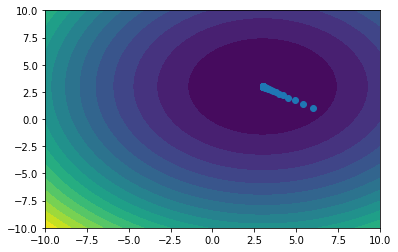

In [10]:
# Initial starting guess. Let's say [6.0, 1.0].
x = torch.tensor([6.0, 1.0], requires_grad = True)
trajectory_x, trajectory_fx = gradient_f(f, x, eta=0.1, nr_steps=5000)

def f(X1, X2):
    return (X1 - 3) ** 2 + (X2 - 3) ** 2

res = np.array(trajectory_x)
X1 = torch.linspace(-10, 10, 1000)
X2 = torch.linspace(-10, 10, 1000)
X1, X2 = torch.meshgrid(X1, X2)
Y = f(X1, X2)

plt.contourf(X1, X2, Y, levels = 20)
plt.scatter(res[:, 0], res[:, 1])

# Problem E.6: The Unavoidable Problem of Local Minima.
Consider the function
<center>
    $f(x) = -e^{-(x - 1)^2} - 5e^{-(x - 10)^2}$
</center>    

## 1. 
Plot the above function in the interval [-10, 20]. (remember, with only valid Py-
Torch valid operations). How many minima does this function have? How would
you describe the function graph and what would you say could make this particular
function-graph harder to find for Gradient Decent to optimize?

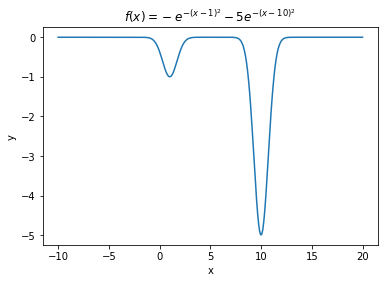

In [11]:
import numpy as np
import torch
from torch import autograd
from matplotlib import pyplot as plt

def f(x):
    return -torch.exp(- (x - 1) ** 2) - 5 * torch.exp(- (x - 10) ** 2)

x = torch.linspace(-10.0, 20, 300)
y = f(x)

plt.title("$f(x) = -e^{-(x - 1)^2} - 5e^{-(x - 10)^2}$") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.plot(x,y) 

As is shown above, there are two local minimas.
<br>
We can see that the maximum of the function is 0 and the minimum is -5. However, there are two local minimas. It would be harder to optimize because there are unavoidable local minimas which may prevent us finding the global minima.

## 2. 
Now you are to code up the usual gradient decent algorithm as you've done before in
order to find the minima of the function. Based on the plot of the function, where
would you put a good initial starting position $x_0$? Why there? When you run Gradient
Descent at that position, to you find that you end up in the global minimum?
<br>
"Looking at the plot" is often not doable when our objective functions are grotesquely
multivariable. Then, we might start at some random position within some region. Try
with a random starting position and see in which local minima you end up. You should
show solution trajectories on the function plot, for both cases where you end.

In [12]:
import numpy as np
import torch
from torch import autograd
from matplotlib import pyplot as plt

def f(x):
    return -torch.exp(- (x - 1) ** 2) - 5 * torch.exp(- (x - 10) ** 2)

# Gradient decent function.
def gradient_f(f, x, eta, nr_steps):
    # Input: 
    # f: objective function; 
    # x: variables; 
    # eta: step length; 
    # nr_steps: the maximum of the iteration times
    #
    # Return:
    # trajectory_x: a list containing variable x
    # trajectory_fx: a list containing f(x) values
    
    # Create two empty lists to store the trajectory, say 𝑡𝑟𝑎𝑗𝑒𝑐𝑡𝑜𝑟𝑦_𝑥 and 𝑡𝑟𝑎𝑗𝑒𝑐𝑡𝑜𝑟𝑦_𝑓𝑥.
    trajectory_x =[]
    trajectory_fx =[]   
    for i in range(nr_steps):
        trajectory_x.append(x.detach().clone().numpy())
        # Compute function at x.
        fx = f(x)
        # Add the value of fx into the end of the trajectory_fx.
        trajectory_fx.append(fx.item())
        # Compute gradient ->  populate all partial derivatives
        fx.backward()
    
        # Gradient decent update.
        with torch.no_grad():
            x -= eta * x.grad
            
        if (torch.abs(x.grad) > 0.00001): # Stopping criteria: to judge when to stop iterations.
            # Eliminate the gradient to avoid the accumulation of previous gradients of x.
            x.grad.zero_()
        else:
            break

    return trajectory_x, trajectory_fx

The minimum of the function is -1.0000, when x = 1.0000.
The minimum of the function is -5.0000, when x = 10.0000.


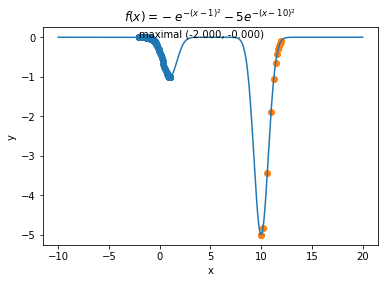

In [13]:
# Initial starting guess. Let's say -2.0.
x_0 = torch.tensor(-2.0, requires_grad = True)
# Step length, eta. Let's say 0.1.
eta = 0.1
# Set the maximum of the iteration times. Let's say 5000 times.
nr_steps = 5000

# Call the graident function.
result = gradient_f(f, x_0, eta, nr_steps)
# Optimal x.
optimal_x = result[0][-1]
# The minimum f(x) value.
min_fx = result[1][-1]

print("The minimum of the function is {:.4f}, when x = {:.4f}.".format(min_fx, optimal_x))

# Plot.
plt.title("Initial guess $x_0$: -2.0.") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.scatter(result[0],result[1])
plt.text(result[0][0], result[1][0], "maximal ({:.3f}, {:.3f})".format(result[0][0], result[1][0]))

# Initial starting guess. Let's say 12.0.
x0 = torch.tensor(12.0, requires_grad = True)
# Step length, eta. Let's say 0.1.
eta = 0.1
# Set the maximum of the iteration times. Let's say 50000 times.
nr_steps = 50000

# Call the graident function.
result = gradient_f(f, x0, eta, nr_steps)

# Optimal x.
optimal_x = result[0][-1]
# The minimum f(x) value.
min_fx = result[1][-1]

print("The minimum of the function is {:.4f}, when x = {:.4f}.".format(min_fx, optimal_x))

# Plot.
plt.title("Initial guess $x_0$: 8.0.") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.scatter(result[0],result[1]) 

x = torch.linspace(-10.0, 20, 300)
y = f(x)
plt.title("$f(x) = -e^{-(x - 1)^2} - 5e^{-(x - 10)^2}$") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.plot(x,y) 

# Problem E.7: Local minima in 2D

This problem will try to simulate even better the feeling of not knowing where to start a good initial guess $x_0$. Consider the multivariable function:
<center>
  $f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$  
</center>
defined on the region $-6 \leq x$, $y \leq 6$.

## 1. 
Plot the function within the specified domain, and manually estimate roughly the
number of minima the function has.

<ipython-input-14-aae6bf1dbc76>:16: UserWarning: The following kwargs were not used by contour: 'level'
  plt.contourf(X, Y, Z, level = 20)


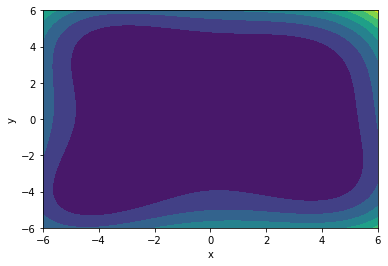

In [14]:
import numpy as np
import torch
from torch import autograd
from matplotlib import pyplot as plt

def f(x, y):
    return np.power((np.power(x, 2) + y - 11), 2) + np.power((x + np.power(y, 2) - 7), 2)

x = np.linspace(-6, 6, 2000)
y = np.linspace(-6, 6, 2000)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.xlabel("x")
plt.ylabel("y")
plt.contourf(X, Y, Z, level = 20)

Guess: there might be $4$ minimas.

## 2. 
Code up the standard PyTorch Gradient Descent algorithm to minimize the above
function. Play around with the step size until you find a value that works. Now you
should find out the position and value of each of the minima you see within the region.
Which among the minima you converge at is the global minimum?

In [15]:
import numpy as np
import torch
from torch import autograd
from matplotlib import pyplot as plt

def f(x, y):
    return torch.pow((torch.pow(x, 2) + y - 11), 2) + torch.pow((x + torch.pow(y, 2) - 7), 2)

def gradient_f(f, x, y, eta, nr_steps):
    trajectory_x = []
    trajectory_y = []
    trajectory_z = []
    
    for i in range(nr_steps):
        trajectory_x.append(x.detach().clone().numpy()) 
        trajectory_y.append(y.detach().clone().numpy())
        # Compute function at (x, y).
        z = f(x, y)
        # Add the value of fx into the end of the trajectory_fx.
        trajectory_z.append(z.item())
        # Compute gradient ->  populate all partial derivatives
        z.backward()
    
        # Gradient decent update.
        with torch.no_grad():
            x -= eta * x.grad
            y -= eta * y.grad
        if (torch.abs(x.grad) > 0.01 or torch.abs(y.grad) > 0.01) : # Stopping criteria: to judge when to stop iterations.
            # Eliminate the gradient to avoid the accumulation of previous gradients of x.
            x.grad.zero_()
            y.grad.zero_()
        else:
            break
    
    return trajectory_x, trajectory_y, trajectory_z

When initial guess is (5, 5), the minimum of the function  is 0.0000, at (3.0001, 1.9996).
When initial guess is (-6, -6), the minimum of the function  is 0.0000, at (-3.7793, -3.2831).
When initial guess is (-4, -3), the minimum of the function  is 0.0000, at (3.5845, -1.8484).
When initial guess is (-4, 4), the minimum of the function  is 0.0000, at (-2.8050, 3.1313).


<ipython-input-16-af0867fc3fc8>:14: UserWarning: The following kwargs were not used by contour: 'level'
  plt.contourf(X, Y, Z, level = 20)


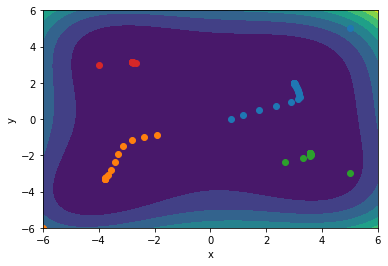

In [16]:
# Initial guess: (5, 5)
x_0 = torch.tensor(5.0, requires_grad = True)

y_0 = torch.tensor(5.0, requires_grad = True)
trajectory_x, trajectory_y, trajectory_z = gradient_f(f, x_0, y_0, eta = 0.01, nr_steps = 3000)

x = torch.linspace(-6, 6, 2000)
y = torch.linspace(-6, 6, 2000)
X, Y = torch.meshgrid(x, y)
Z = f(X, Y)

plt.xlabel("x")
plt.ylabel("y")
plt.contourf(X, Y, Z, level = 20)
plt.scatter(trajectory_x, trajectory_y)


print("When initial guess is (5, 5), the minimum of the function  is {:.4f}, at ({:.4f}, {:.4f})."
      .format(trajectory_z[-1], trajectory_x[-1], trajectory_y[-1]))


# Initial guess: (-6, -6)
x_0 = torch.tensor(-6.0, requires_grad = True)
y_0 = torch.tensor(-6.0, requires_grad = True)
trajectory_x, trajectory_y, trajectory_z = gradient_f(f, x_0, y_0, eta = 0.01, nr_steps = 3000)

plt.xlabel("x")
plt.ylabel("y")
plt.scatter(trajectory_x, trajectory_y)

print("When initial guess is (-6, -6), the minimum of the function  is {:.4f}, at ({:.4f}, {:.4f})."
      .format(trajectory_z[-1], trajectory_x[-1], trajectory_y[-1]))


# Initial guess: (5, -3)
x_0 = torch.tensor(5.0, requires_grad = True)
y_0 = torch.tensor(-3.0, requires_grad = True)
trajectory_x, trajectory_y, trajectory_z = gradient_f(f, x_0, y_0, eta = 0.01, nr_steps = 3000)

plt.xlabel("x")
plt.ylabel("y")
plt.scatter(trajectory_x, trajectory_y)

print("When initial guess is (-4, -3), the minimum of the function  is {:.4f}, at ({:.4f}, {:.4f})."
      .format(trajectory_z[-1], trajectory_x[-1], trajectory_y[-1]))


# Initial guess: (-4, 3)
x_0 = torch.tensor(-4.0, requires_grad = True)
y_0 = torch.tensor(3.0, requires_grad = True)
trajectory_x, trajectory_y, trajectory_z = gradient_f(f, x_0, y_0, eta = 0.01, nr_steps = 3000)

plt.xlabel("x")
plt.ylabel("y")
plt.scatter(trajectory_x, trajectory_y)

print("When initial guess is (-4, 4), the minimum of the function  is {:.4f}, at ({:.4f}, {:.4f})."
      .format(trajectory_z[-1], trajectory_x[-1], trajectory_y[-1]))

# Problem E.8: Eprin Pharmaceuticals GmbH and Their Crappy Pain Killer
Eprin Pharmaceuticals GmbH is a very fresh start up in the pain-killer industry and was
started by two 'cool' and 'hip' dudes that wanted to \disrupt" the industry. The company
provides yet another generic pain-killer, which they simply buy in large quantities from a
third world country using an unclear distributor with a history of shady, exploitative labour
tactics.
<br>
The start-up has a problem with its new product Nohurtveldon. People are complaining
that using Nohurtveldon barely works as intended and even if it does work, it works for
a very short time. Now imagine you are the company's first Quantitative Scientist. Also
assume that you have read about this problem during your morning-meeting with your
Research & Development team. Your thinking is that, for the active ingredient X (chem-
ical compound of Nohurtveldon) to work, its blood concentration must reach above some
threshold. Therefore you get reminded on some Pharmacokinetics theory in order to model
how much the concentration of drug in the blood changes over time from the time a person
intakes an initial dose. Lucky for you, there is already a mathematical formula/model that
predicts the concentration of a drug in the body as a function of time as follows:
<center>
    $C(t) = \frac{k_{ab} * f * M_0}{(k_{ab} - k_{el})*V_{blood}}(e^{-{k_{el}}t}-e^{-{k_{ab}}t})$
</center>

* $C(t)$ is the concentration of substance in the blood at time $t$.
* $M_0$: Mass of drug administered at time zero - here meaning a Nohurtveldon pill.
* $f$: Fraction of the drug absorbed.
* $k_{ab}$: is the rate of chemical body absorption.
* $k_{el}$: is the rate of elimination of compound X. This is basically the amount of compound that degrades per time unit and therefore can't be used by the body anymore.
* $V_{blood}$: The volume of blood of a person ingesting the substance in question. The
average amount of blood in an adult is between 4-8 liters ($dm^3$). Here, you should assume $V_{blood}$ = 5 liters.

## (b) 
Using a PyTorch approach, solve the above optimization problem, and determine if
your suspicions are correct. Report this briefly but convincingly with formulas and
plots.

In [17]:
import numpy as np
import torch
from torch import autograd
from matplotlib import pyplot as plt

def c(t): # 在t的時候，藥物X在血液中的濃度(最少25mg/liter藥物才有效)
    m0 = 400 #mg
    f =0.5
    kab = 0.3
    kel = 0.1
    vblood = 5 #liters
    return (kab * f * m0)/((kab - kel) * vblood)*(torch.exp(-kel*t)-torch.exp(-kab*t)) #  c(t) > 25 =0

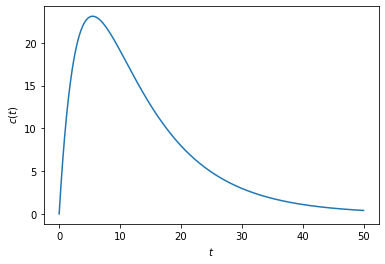

In [18]:
t = torch.linspace(0, 50, 1000)
plt.xlabel('$t$')
plt.ylabel('$\ c(t) $')
plt.plot(t, c(t))

Text(5.4944954, 23.094009399414062, 'maximal (5.494, 23.094)')

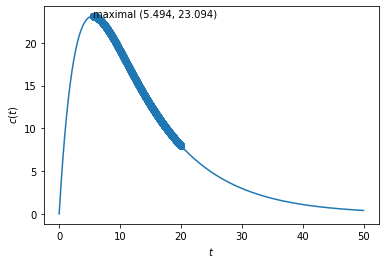

In [19]:
import numpy as np
import torch
from torch import autograd
from matplotlib import pyplot as plt

def c(t): # 在t的時候，藥物X在血液中的濃度(最少25mg/liter藥物才有效)
    m0 = 400 #mg
    f =0.5
    kab = 0.3
    kel = 0.1
    vblood = 5 #liters
    return (kab * f * m0)/((kab - kel) * vblood)*(torch.exp(-kel*t)-torch.exp(-kab*t)) #  c(t) > 25 =0


def gradient_c(c, t, eta, nr_steps):
    # Input: 
    # f: objective function; 
    # x: variables; 
    # eta: step length; 
    # nr_steps: the maximum of the iteration times
    #
    # Return:
    # trajectory_x: a list containing variable x
    # trajectory_fx: a list containing f(x) values
    
    # Create two empty lists to store the trajectory, say 𝑡𝑟𝑎𝑗𝑒𝑐𝑡𝑜𝑟𝑦_𝑥 and 𝑡𝑟𝑎𝑗𝑒𝑐𝑡𝑜𝑟𝑦_𝑓𝑥.
    trajectory_t =[]
    trajectory_c =[]   
    for i in range(nr_steps):
        trajectory_t.append(t.detach().clone().numpy())
        # Compute function at t.
        ct = c(t)
        # Add the value of fx into the end of the trajectory_fx.
        trajectory_c.append(ct.item())
        # Compute gradient ->  populate all partial derivatives
        ct.backward()
    
        # Gradient decent update.
        with torch.no_grad():
            t += eta * t.grad
        
        if (torch.abs(t.grad) > 0.001): # Stopping criteria: to judge when to stop iterations.
            # Eliminate the gradient to avoid the accumulation of previous gradients of x.
            t.grad.zero_()
        else:
            break
            
    return  trajectory_t, trajectory_c

t_0 = torch.tensor(20.0, requires_grad = True)
trajectory_t,  trajectory_c = gradient_c(c, t_0, eta = 0.01, nr_steps=5000)

# print(trajectory_t[0])
# print(trajectory_t[-1])
# print(trajectory_c[-1])

plt.scatter(trajectory_t, trajectory_c)
t = torch.linspace(0, 50, 1000)
plt.xlabel('$t$')
plt.ylabel('$\ c(t) $')
plt.plot(t, c(t))

plt.text(trajectory_t[-1], trajectory_c[-1], "maximal ({:.3f}, {:.3f})".format(trajectory_t[-1], trajectory_c[-1]))